In [9]:
import numpy as np
from random import *
from time import *
import matplotlib.pyplot as plt
import math


## Fonction utiliser dans karger et kargerIter et kargerStein

In [5]:
def contraction(g, arete):
    i, j = arete  #les deux sommets de l'arête 
    noeud = i + "," + j #le nouveau sommet
    g[noeud] = [] #la liste des successeur du sommet 
    #O(n)
    for elm in g[i]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    #O(n)
    for elm in g[j]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    
    del g[i] 
    del g[j]
    return g

In [4]:
#Chaque sommet existe dans le dictionnaire exactement le nombre de fois ou elle est relier par une arête 
##On construit une liste qui est la concatination de toutes les liste du dictionaire on note LISTE
####Sa complexiter est O(n) 
## 1 - on tire un sommet aléatoir dans la liste LIST on note S 
#  2 - on tire un autre sommet aléatoir de la liste du sommet S 
def randomSommet(g):
    liste = []
    #O(n)
    for elm in g.keys():
        liste += list(g[elm])
    
    i = randint(0, len(liste)-1)
    s1 = liste[i]
    s2 = -1
    if s1 in g:
        i = randint(0, len(g[s1])-1)
        s2 = g[s1][i]
    else:
        l = list(g.keys())
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s1 in e:
                i = randint(0, len(g[elm]) - 1)
                s1 = elm
                s2 = g[elm][i]
                break
    
    l = list(g.keys())    
    if s2 not in g:
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s2 in e:
                s2 = elm
                break
    return (s1, s2)

In [43]:
####Géneration de graphe
#Graphe avec cycle
def grapheCycle(taille):
    g = dict()
    i = 1 
    while i < taille:
        g[str(i)] = [str(i+1)]
        i += 1
    g[str(taille)] = [str(1)]
    i = taille
    while i > 1:
        g[str(i)].append(str(i-1))
        i -= 1
    g['1'].append(str(taille))
    return g

#grapheComplet
def grapheComplet(taille):
    g = dict()
    #la liste de tous les sommets 
    liste = []
    i = 1
    while i <= taille:
        liste.append(str(i))
        i += 1
    
    i = 1
    while i <= taille:
        liste1 = liste.copy()
        liste1.remove(str(i))
        g[str(i)] = liste1 
        i += 1
    return g

#Graphe bipartie complet
def grapheBipartieComplet(taille): #taille doit être multiple de 2 sinon on prend taille+1 ; E1 = {sommet1, ..., sommetTaille/2}
                            #et E1 = {sommet_Taille/2+1, ..., sommetTaille}
    g = dict()
    
    if(taille %2 != 0):
        taille += 1
    listeSommetE1 = []
    i = 1
    while i <= taille/2:
        listeSommetE1.append(str(i))
        i += 1
    listeSommetE2 = []
    while i <= taille:
        listeSommetE2.append(str(i))
        i += 1
    
    i = 1
    while i <= taille/2:
        g[str(i)] = listeSommetE2
        i += 1
    while i <= taille:
        g[str(i)] = listeSommetE1
        i += 1
    return g
 
#graphe aleatoire 
def grapheAleatoir(taille):
    g = dict()
    i = 1
    while i < taille:
        if str(i) not in list(g.keys()):
            g[str(i)] = []
        j = i + 1
        while j <= taille:
            if randint(0,1) == 1:
                g[str(i)].append(str(j))
                if str(j) not in list(g.keys()):
                    g[str(j)] = []
                g[str(j)].append(str(i))
                    
                
            j += 1
        i += 1
        
    return g



## Les fonction de karger

In [77]:
def karger(g):
    while len(g.keys()) > 2:
        arete = randomSommet(g)
        g = contraction2(g, arete) 
    return g

In [78]:
##Les fonctions de testes
#Teste sur des graphes avec un cycles 
def testGrapheCycle(listeDesTaille, nbRep): #Elle retourne 2 liste une liste avec les tailles et l'autre les temps correspondant a chaque taille
                                #Pour chaque taille de la listeDesTaille elle le fait nbRep fois et elle retourne la moyenne de la taille
        
        listeTemps = []
        listeTaille = []
        for i in listeDesTaille:
            moyenne = 0
            for j in range(nbRep):
                g = grapheCycle(i)
                debut = time()
                karger(g)
                tmps = time() - debut
                moyenne += tmps
            listeTemps.append(moyenne/nbRep)
            listeTaille.append(i)
        return listeTaille, listeTemps


def testGrapheComplet(listeDesTaille, nbRep):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheComplet(i)
            debut = time()
            karger(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)

    return listeTaille, listeTemps

def testGrapheBipartie(listeDesTaille, nbRep):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheBipartieComplet(i)
            debut = time()
            karger(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(taille+(nbRep/2))
        taille += nbRep
    return listeTaille, listeTemps

def testGrapheAleatoire(listeDesTaille, nbRep):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheAleatoir(i)
            debut = time()
            karger(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
        taille += nbRep
    return listeTaille, listeTemps

In [101]:
def testProba1(graphe, nbTest, tailleCoupe): #Elle prend en pramètre le graphe, le nb de teste a faire et
                                              #et la taille de la coupe minimal
    taille = tailleCoupe
    nbSucces = 0
    for i in range(nbTest):
        g1 = graphe.copy()
        g = karger(g1) # Les deux coupe du format {'som1, som2, ...': [suc1, suc2], 'som1, som2, ...': [suc1, suc2]}
        s = list(g.keys())[0] #une des deux coupe
        t = len(g[s]) #la taille de la coupe
        if t == taille:
            nbSucces += 1
    return nbSucces

## Les fonctions de kargerIter

In [23]:
def kargerIter(g, T):
    m_star = math.inf
    gFinal = dict()

    for i in range(T):
        g1 = g.copy()

        while len(g1.keys()) > 2:
            arete =randomSommet(g1)
            g1 = contraction(g1, arete)

        print(g1)

        sIter = list(g1.keys())[0]
        m = len(g1[sIter])

        if(m < m_star):
            gFinal = g1.copy()
            m_star = m
        
    return gFinal
        


In [29]:
# test
g = {'1': ['2', '3'],
     '2': ['1', '3', '5'],
     '3': ['1', '2', '4'],
     '4': ['3', '5'],
     '5': ['2', '4']}

kargerIter(g,10)

{'5,4': ['2', '3'], '1,2,3': ['5', '4']}
{'4,5,3': ['2', '1', '2'], '2,1': ['3', '5', '3']}
{'5,2,4': ['1', '3', '3'], '3,1': ['2', '4', '2']}
{'1,3': ['2', '2', '4'], '2,4,5': ['1', '3', '3']}
{'1': ['2', '3'], '3,2,4,5': ['1', '1']}
{'4': ['3', '5'], '5,3,2,1': ['4', '4']}
{'1': ['2', '3'], '4,5,2,3': ['1', '1']}
{'4,3': ['5', '1', '2'], '1,2,5': ['3', '3', '4']}
{'2': ['1', '3', '5'], '1,3,4,5': ['2', '2', '2']}
{'5': ['2', '4'], '4,3,2,1': ['5', '5']}


{'5,4': ['2', '3'], '1,2,3': ['5', '4']}

#### Teste de kargerIter

In [195]:
#Teste sur des graphes avec un cycles 
def testGrapheCycle1(listeDesTaille, nbRep, nb = 10): #Elle retourne 2 liste une liste avec les tailles et l'autre les temps correspondant a chaque taille
                                #Pour chaque taille de la listeDesTaille elle le fait nbRep fois et elle retourne la moyenne de la taille
        
        listeTemps = []
        listeTaille = []
        for i in listeDesTaille:
            moyenne = 0
            for j in range(nbRep):
                g = grapheCycle(i)
                debut = time()
                kargerIter(g, nb)
                tmps = time() - debut
                moyenne += tmps
            listeTemps.append(moyenne/nbRep)
            listeTaille.append(i)
        return listeTaille, listeTemps


def testGrapheComplet1(listeDesTaille, nbRep, nb = 10):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheComplet(i)
            debut = time()
            kargerIter(g, nb)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
    return listeTaille, listeTemps

def testGrapheBipartie1(listeDesTaille, nbRep, nb = 10):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheBipartieComplet(i)
            debut = time()
            kargerIter(g, nb)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
    return listeTaille, listeTemps

def testGrapheAleatoire1(listeDesTaille, nbRep, nb = 10):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheAleatoir(i)
            debut = time()
            kargerIter(g, nb)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
    return listeTaille, listeTemps

In [196]:
def testProba2(graphe, nbTest, tailleCoupe, nb = 10): #Elle prend en pramètre le graphe, le nb de teste a faire et
                                              #et la taille de la coupe minimal
    taille = tailleCoupe
    nbSucces = 0
    for i in range(nbTest):
        g1 = graphe.copy()
        g = kargerIter(g1, nb) # Les deux coupe du format {'som1, som2, ...': [suc1, suc2], 'som1, som2, ...': [suc1, suc2]}
        s = list(g.keys())[0] #une des deux coupe
        t = len(g[s]) #la taille de la coupe
        if t == taille:
            nbSucces += 1
    return nbSucces

## Les fonctions pour kargerStein


In [197]:
def contractionPartielle(g ,t):
    g1 = g.copy()
    while(len(g1.keys()) > t):
        arete = randomSommet(g1)
        contraction(g1, arete)
        
    return g1

def calculCoup(g):
    m = -1 #la taille de la coupe minimale trouver jusqu'a maintenant 
    listKeys = list(g.keys()) #Les sommets du graphe g 
    n = len(listKeys) #Le nombre de sommet du graphe g
    nb = pow(2, n) - 2 #Le nombre de combinaison a essaie
    i = 1
    sBest = dict() #La coupe minimale
    while i < nb:
        s = i
        sommet = []
        j = 0
        ##calculer les sommets attester comme coupe
        while s > 0: 
            if s%2 == 1:
                sommet.append(j)
            s  = int(s/2)
            j += 1
        if (len(sommet) == 1): #Couper que le sommet
            som = sommet[0] #récupèrer le numéro du sommet
            som =  listKeys[som] #récupèrer la clé du sommet 
            if m == -1 or m > len(g[som]) :
                m = len(g[som])
                sBest = som
        else: #compter le nombre d'arête sortante 
            #recupèrer la coupe actuel
            sActuel = []
            for s in sommet:
                som = listKeys[s]
                for elm in som.split(','):
                    sActuel.append(elm)
            #compter le nombre d'arête de la coupe actuelle 
            coupe1 = 0
            for s in sommet:
                som = listKeys[s]
                arete = g[som] #Les successeurs du sommet 
                for elm in arete:
                    if elm not in sActuel:
                        coupe1 += 1
            if m == -1 or m > coupe1:
                m = coupe1 
                sBest = ','.join(sActuel) #La coupe minimale
        
        i += 1
    return sBest.split(",")
                
    
def kargerStein(g):
    m = -1 
    if len(list(g.keys())) <= 6:
        return calculCoup(g)
    else:
        t = int( 1 + len( list(g.keys())) / sqrt(2))
        g1 = contractionPartielle(g, t)
        s1 = kargerStein(g1)
        m1 = len(s1)
        g2 = contractionPartielle(g, t)
        s2 = kargerStein(g2)
        m2 = len(s2)
        if m1 < m2:
            return s1
        else:
            return s2
        

In [172]:
#Teste sur des graphes avec un cycles 
def testGrapheCycle2(listeDesTaille, nbRep): #Elle retourne 2 liste une liste avec les tailles et l'autre les temps correspondant a chaque taille
                                #Pour chaque taille de la listeDesTaille elle le fait nbRep fois et elle retourne la moyenne de la taille
        
        listeTemps = []
        listeTaille = []
        for i in listeDesTaille:
            moyenne = 0
            for j in range(nbRep):
                g = grapheCycle(i)
                debut = time()
                kargerStein(g)
                tmps = time() - debut
                moyenne += tmps
            listeTemps.append(moyenne/nbRep)
            listeTaille.append(i)
        return listeTaille, listeTemps


def testGrapheComplet2(listeDesTaille, nbRep):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheComplet(i)
            debut = time()
            kargerStein(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
    return listeTaille, listeTemps

def testGrapheBipartie2(listeDesTaille, nbRep):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheBipartieComplet(i)
            debut = time()
            kargerStein(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
        taille += nbRep
    return listeTaille, listeTemps

def testGrapheAleatoire3(listeDesTaille, nbRep):
    listeTemps = []
    listeTaille = []
    for i in listeDesTaille:
        moyenne = 0
        for j in range(nbRep):
            g = grapheAleatoir(i)
            debut = time()
            kargerStein(g)
            tmps = time() - debut
            moyenne += tmps
        listeTemps.append(moyenne/nbRep)
        listeTaille.append(i)
        taille += nbRep
    return listeTaille, listeTemps

In [198]:
def testProba3(graphe, nbTest, tailleCoupe): #Elle prend en pramètre le graphe, le nb de teste a faire et
                                              #et la taille de la coupe minimal
    taille = tailleCoupe
    nbSucces = 0
    for i in range(nbTest):
        g1 = graphe.copy()
        g = kargerStein(g1) # Les deux coupe du format {'som1, som2, ...': [suc1, suc2], 'som1, som2, ...': [suc1, suc2]}
        key = ','.join(g)
        t = len(g1[key]) #la taille de la coupe
        if t == taille:
            nbSucces += 1
    return nbSucces

Analyse experimentale de la complexité

In [98]:
#Graphe avec cycle
N = [10,30,50,70,90,110,130,150]
tailleCycle1, tempsCycle1 = testGrapheCycle(N, 20) #Karger
tailleCycle2, tempsCycle2 = testGrapheCycle1(N, 20) #Karger iter
tailleCycle3, tempsCycle3 = testGrapheCycle2(N, 20) #Karger stein


In [199]:
#Graphe complet
N = [10,15,20,25,30,35,40,45]
tailleComplet1, tempsComplet1 = testGrapheComplet(N, 20) #Karger
tailleComplet2, tempsComplet2 = testGrapheComplet1(N, 20) #Karger iter
tailleComplet3, tempsComplet3 = testGrapheComplet2(N, 20) #Karger stein

Complexité de kargen

In [192]:
#Graphe complet
N = []
i = 10
while i <= 50:
    N.append(i)
    i += 5
    
tailleComplet3, tempsComplet3 = testGrapheComplet2(N, 10) #Karger stein

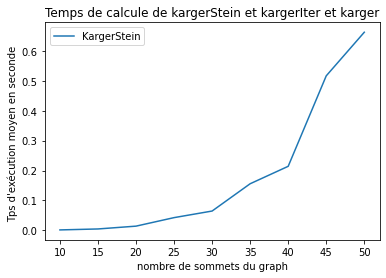

In [193]:
plt.figure()
plt.title('Temps de calcule de kargerStein et kargerIter et karger')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Tps d\'exécution moyen en seconde ')
plt.plot(N, tempsComplet3 , label= "KargerStein")
plt.legend()
plt.show()

Comparaison

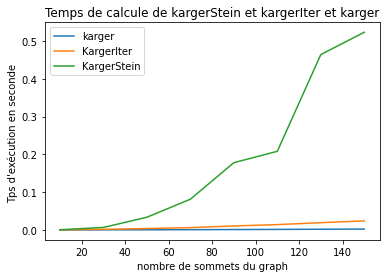

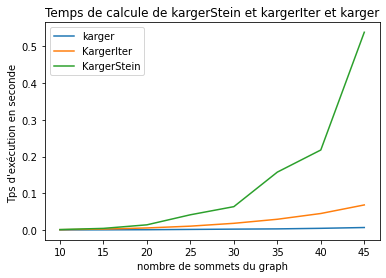

In [201]:
# Comparaison
plt.figure()
plt.title('Temps de calcule de kargerStein et kargerIter et karger')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Tps d\'exécution en seconde ')
plt.plot(tailleCycle1, tempsCycle1, label='karger')
plt.plot(tailleCycle2, tempsCycle2, label='KargerIter')
plt.plot(tailleCycle3, tempsCycle3 , label= "KargerStein")
plt.legend()
plt.show()

# Comparaison
plt.figure()
plt.title('Temps de calcule de kargerStein et kargerIter et karger')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Tps d\'exécution en seconde ')
plt.plot(tailleComplet1, tempsComplet1, label='karger')
plt.plot(tailleComplet2, tempsComplet2, label='KargerIter')
plt.plot(tailleComplet3, tempsComplet3 , label= "KargerStein")
plt.legend()
plt.show()

On vois que kargerStein prend largement plus de temps pour s'executer 

### Analyse de la probalité de succes
######## Karger iter avec paramètre 2

##### Sur un graphe bipartie complet

In [143]:
deb = 6 # La taille du graphe en début
listeProbaKarger = []
listeProbaKargerIter = []
listeProbaKargerStein = []
listeTaille = []
while deb <= 26:
    listeTaille.append(deb)
    g = grapheBipartieComplet(deb)
    nbSuccesKarger = testProba1(g, 1000, deb/2)
    nbSuccesKargerIter = testProba2(g, 1000, deb/2, 2)
    nbSuccesKargerStein = testProba3(g, 1000, deb/2)
    
    listeProbaKarger.append(nbSuccesKarger/1000)
    listeProbaKargerIter.append(nbSuccesKargerIter/1000)
    listeProbaKargerStein.append(nbSuccesKargerStein/1000)
    deb += 2 


6
8
10
12
14
16
18
20
22
24
26


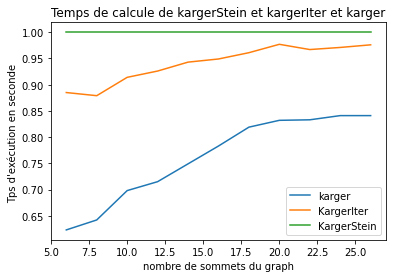

In [148]:
# Comparaison
plt.figure()
plt.title('Temps de calcule de kargerStein et kargerIter et karger')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Tps d\'exécution en seconde ')
plt.plot(listeTaille, listeProbaKarger,  label='karger')
plt.plot(listeTaille, listeProbaKargerIter,  label='KargerIter')
plt.plot(listeTaille, listeProbaKargerStein,  label= "KargerStein")
plt.legend()
plt.show()

##### Sur un graphe complet

10
12
14
16
18
20


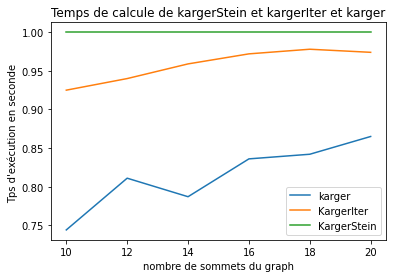

In [149]:
deb = 10 # La taille du graphe en début
listeProbaKarger1 = []
listeProbaKargerIter1 = []
listeProbaKargerStein1 = []
listeTaille1 = []
while deb <= 20:
    listeTaille1.append(deb)
    g = grapheComplet(deb)
    nbSuccesKarger = testProba1(g, 1000, deb - 1)
    nbSuccesKargerIter = testProba2(g, 1000, deb - 1, 2)
    nbSuccesKargerStein = testProba3(g, 1000, deb -1)
    
    listeProbaKarger1.append(nbSuccesKarger/1000)
    listeProbaKargerIter1.append(nbSuccesKargerIter/1000)
    listeProbaKargerStein1.append(nbSuccesKargerStein/1000)
    print(deb)
    deb += 2
    
# Comparaison
plt.figure()
plt.title('Temps de calcule de kargerStein et kargerIter et karger')
plt.xlabel('nombre de sommets du graph')
plt.ylabel('Tps d\'exécution en seconde ')
plt.plot(listeTaille1, listeProbaKarger1, label='karger')
plt.plot(listeTaille1, listeProbaKargerIter1, label='KargerIter')
plt.plot(listeTaille1, listeProbaKargerStein1, label= "KargerStein")
plt.legend()
plt.show()

On voie bien que kargerStein prend plus de temps mais elle retourne presque toujours une coupe minimale